In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')




In [2]:
#df = pd.read_csv("../data/train_merged_df.csv")
df = pd.read_csv("../data/traindata_with_lockdown.csv")

df = df.drop("Unnamed: 0", axis=1)


df.head()

,datetime,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_weekend,temperature_2m,...,vapour_pressure_deficit,cape,evapotranspiration,et0_fao_evapotranspiration,snowfall,rain,showers,weather_code,visibility,lockdown_code
0,2020-01-01 00:00:00,2020-01-01 00,42.9,0.718,15.7,73.1,64.4,1,0,0.9,...,0.00,NaN,NaN,0.0,0.0,0.0,0.0,3,NaN,0
1,2020-01-01 01:00:00,2020-01-01 01,33.6,0.587,10.1,74.8,66.0,1,0,-0.1,...,0.00,NaN,NaN,0.0,0.0,0.0,0.0,3,NaN,0
2,2020-01-01 02:00:00,2020-01-01 02,29.3,NaN,5.1,51.0,44.9,1,0,2.6,...,0.01,NaN,NaN,0.0,0.0,0.0,0.0,3,NaN,0
3,2020-01-01 03:00:00,2020-01-01 03,30.5,0.246,7.2,27.7,25.1,1,0,2.1,...,0.00,NaN,NaN,0.0,0.0,0.0,0.0,3,NaN,0
4,2020-01-01 04:00:00,2020-01-01 04,29.3,0.204,8.3,15.3,13.6,1,0,1.9,...,0.00,NaN,NaN,0.0,0.0,0.0,0.0,3,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40991 entries, 0 to 40990
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   datetime                    40991 non-null  object 
 1   id                          40991 non-null  object 
 2   valeur_NO2                  37694 non-null  float64
 3   valeur_CO                   28462 non-null  float64
 4   valeur_O3                   40298 non-null  float64
 5   valeur_PM10                 33824 non-null  float64
 6   valeur_PM25                 39200 non-null  float64
 7   is_holiday                  40991 non-null  int64  
 8   is_weekend                  40991 non-null  int64  
 9   temperature_2m              40991 non-null  float64
 10  relative_humidity_2m        40991 non-null  int64  
 11  dew_point_2m                40991 non-null  float64
 12  apparent_temperature        40991 non-null  float64
 13  pressure_msl                409

In [4]:
df.describe()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_weekend,temperature_2m,relative_humidity_2m,dew_point_2m,...,vapour_pressure_deficit,cape,evapotranspiration,et0_fao_evapotranspiration,snowfall,rain,showers,weather_code,visibility,lockdown_code
count,37694.000000,28462.000000,40298.000000,33824.000000,39200.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,...,40991.000000,0.0,0.0,40991.000000,40991.000000,40991.000000,40991.0,40991.000000,0.0,40991.000000
mean,21.831528,0.200710,50.574349,18.221523,11.051161,0.030446,0.285721,12.896148,75.291967,8.097229,...,0.489969,NaN,NaN,0.101095,0.000755,0.093296,0.0,10.539021,NaN,0.355444
std,14.658381,0.103691,26.488626,11.282385,8.151742,0.171812,0.451763,7.063107,16.959621,5.402899,...,0.569857,NaN,NaN,0.138952,0.022911,0.411652,0.0,19.420156,NaN,0.618476
min,1.100000,0.037000,-1.900000,0.500000,0.000000,0.000000,0.000000,-5.700000,17.000000,-16.800000,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,NaN,0.000000
25%,11.300000,0.145000,33.000000,10.700000,5.800000,0.000000,0.000000,7.900000,64.000000,4.600000,...,0.130000,NaN,NaN,0.010000,0.000000,0.000000,0.0,1.000000,NaN,0.000000
50%,17.600000,0.177000,50.700000,15.600000,8.700000,0.000000,0.000000,12.500000,79.000000,8.300000,...,0.280000,NaN,NaN,0.040000,0.000000,0.000000,0.0,3.000000,NaN,0.000000
75%,28.200000,0.226000,66.600000,22.900000,13.600000,0.000000,1.000000,17.900000,89.000000,12.000000,...,0.630000,NaN,NaN,0.140000,0.000000,0.000000,0.0,3.000000,NaN,1.000000
max,131.000000,4.309000,193.100000,128.500000,111.100000,1.000000,1.000000,39.200000,100.000000,23.200000,...,5.740000,NaN,NaN,0.870000,2.170000,15.400000,0.0,75.000000,NaN,2.000000


In [5]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nDtypes:\n", df.dtypes)

Shape: (40991, 42)

Columns:
 Index(['datetime', 'id', 'valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10',
       'valeur_PM25', 'is_holiday', 'is_weekend', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'apparent_temperature',
       'pressure_msl', 'wind_speed_10m', 'wind_direction_10m', 'precipitation',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'diffuse_radiation',
       'global_tilted_irradiance', 'wind_speed_80m', 'wind_speed_120m',
       'wind_speed_180m', 'wind_direction_80m', 'wind_direction_120m',
       'wind_direction_180m', 'wind_gusts_10m', 'vapour_pressure_deficit',
       'cape', 'evapotranspiration', 'et0_fao_evapotranspiration', 'snowfall',
       'rain', 'showers', 'weather_code', 'visibility', 'lockdown_code'],
      dtype='object')

Dtypes:
 datetime                       object
id                             object
valeur_NO2                    float64
val

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In [7]:
df = df.sort_values('datetime')

In [8]:
# Check datetime range
print("\nDate Range:", df['datetime'].min(), "to", df['datetime'].max())


Date Range: 2020-01-01 00:00:00 to 2024-09-03 22:00:00


In [9]:
dupes = df['datetime'].duplicated().sum()
print(f"Duplicate timestamps: {dupes}")

Duplicate timestamps: 0


In [10]:
# Set datetime index
df = df.set_index('datetime')


In [11]:
# Hourly frequency sanity check
expected_freq = pd.date_range(df.index.min(), df.index.max(), freq='H')
missing_timestamps = expected_freq.difference(df.index)
print(f"Missing timestamps: {len(missing_timestamps)}")

Missing timestamps: 0


                            missing_count  missing_percent
wind_speed_80m                      40991           100.00
visibility                          40991           100.00
wind_speed_120m                     40991           100.00
wind_speed_180m                     40991           100.00
wind_direction_80m                  40991           100.00
wind_direction_120m                 40991           100.00
evapotranspiration                  40991           100.00
cape                                40991           100.00
wind_direction_180m                 40991           100.00
valeur_CO                           12529            30.57
valeur_PM10                          7167            17.48
valeur_NO2                           3297             8.04
valeur_PM25                          1791             4.37
valeur_O3                             693             1.69
wind_gusts_10m                          0             0.00
id                                      0             0.

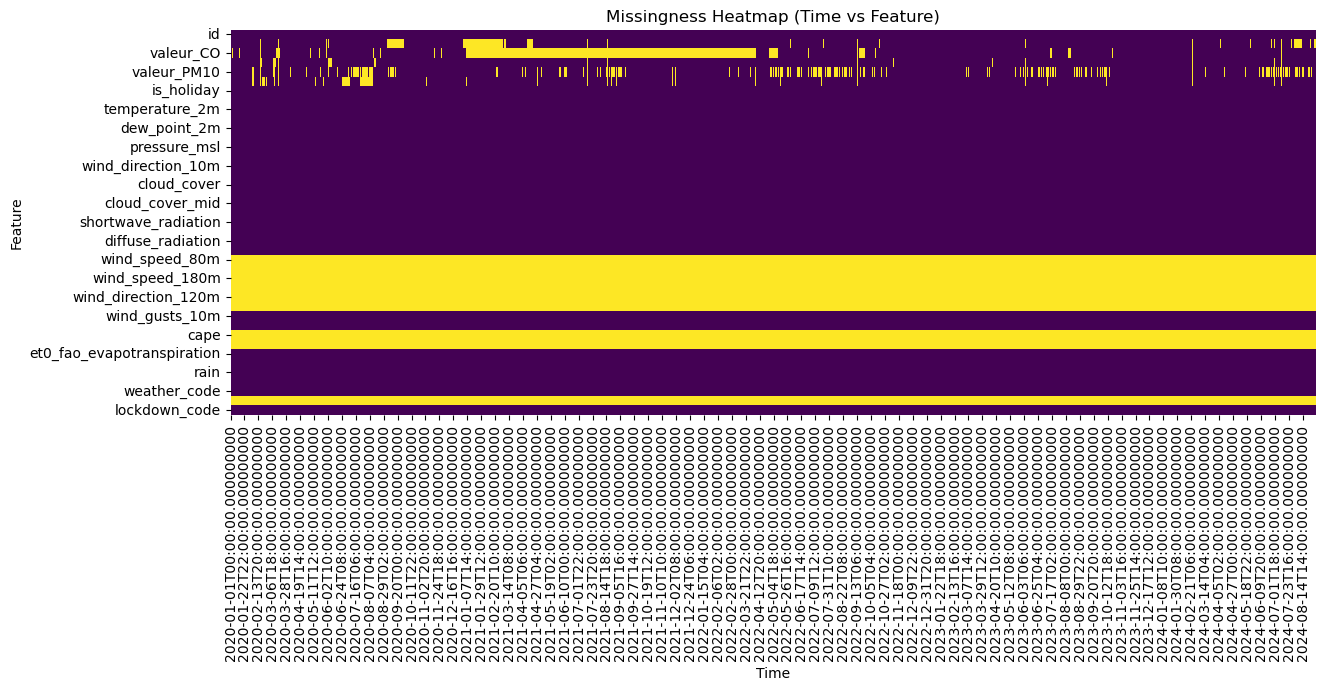

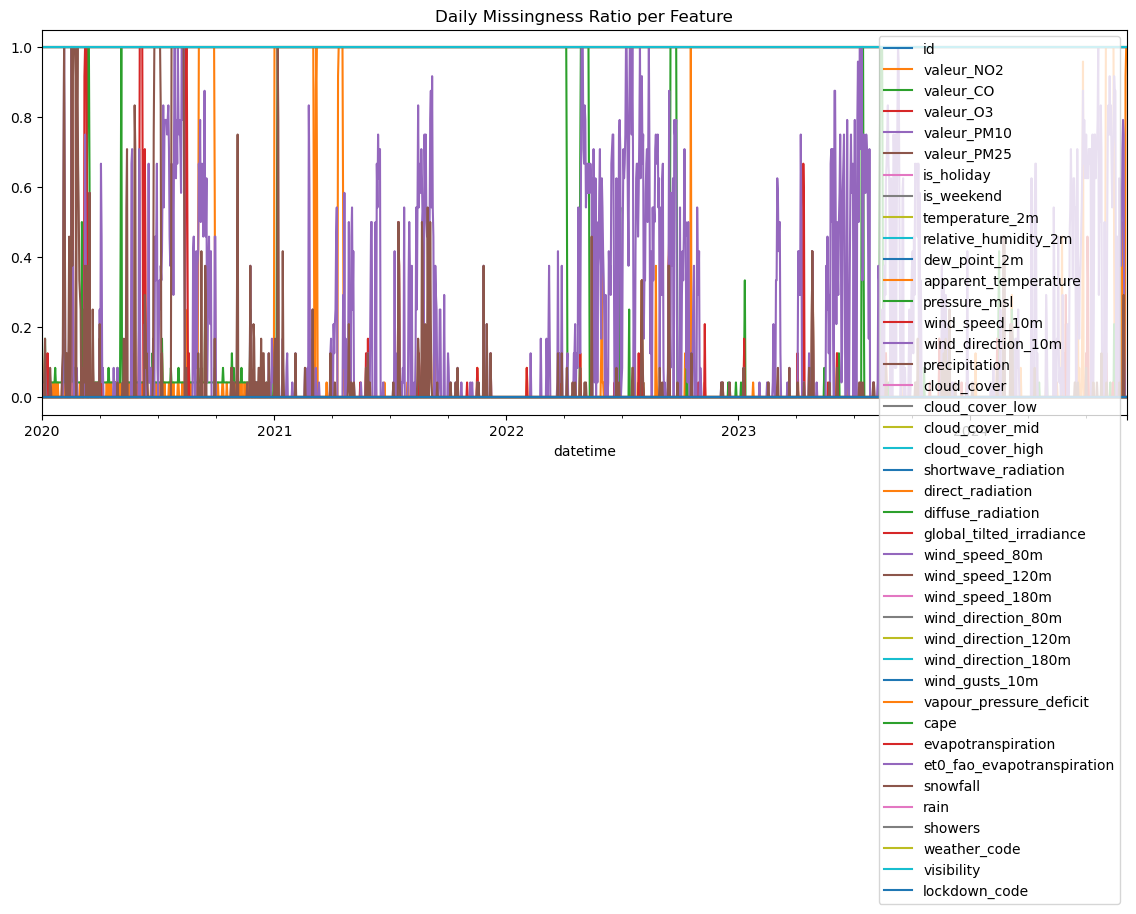

In [12]:
# Step 2: Missingness overview
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_pct.round(2)
})
print(missing_df)

# Visualize missingness heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull().T, cmap='viridis', cbar=False)
plt.title("Missingness Heatmap (Time vs Feature)")
plt.xlabel("Time")
plt.ylabel("Feature")
plt.show()

# Plot missing ratio per day
missing_per_day = df.isna().resample('D').mean()
missing_per_day.plot(figsize=(14,5))
plt.title("Daily Missingness Ratio per Feature")
plt.show()


In [13]:
# Step 3A: Drop completely empty columns
df = df.drop(columns=df.columns[df.isna().mean() == 1.0])

print("Remaining columns after cleanup:", len(df.columns))

# Step 3B: Quick check for negative or extreme outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
negatives = (df[numeric_cols] < 0).sum().sort_values(ascending=False)
print("\nNegative value counts:")
print(negatives[negatives > 0])

# Quick check of pollutant value ranges
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
df[pollutants].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])


Remaining columns after cleanup: 32

Negative value counts:
apparent_temperature    4009
dew_point_2m            2863
temperature_2m          1036
valeur_O3                 10
dtype: int64


,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
count,37694.000000,28462.000000,40298.000000,33824.000000,39200.000000
mean,21.831528,0.200710,50.574349,18.221523,11.051161
std,14.658381,0.103691,26.488626,11.282385,8.151742
min,1.100000,0.037000,-1.900000,0.500000,0.000000
1%,4.400000,0.088000,0.700000,3.200000,1.700000
25%,11.300000,0.145000,33.000000,10.700000,5.800000
50%,17.600000,0.177000,50.700000,15.600000,8.700000
75%,28.200000,0.226000,66.600000,22.900000,13.600000
99%,71.400000,0.583390,123.203000,59.177000,41.100000
max,131.000000,4.309000,193.100000,128.500000,111.100000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          40991 non-null  object 
 1   valeur_NO2                  37694 non-null  float64
 2   valeur_CO                   28462 non-null  float64
 3   valeur_O3                   40298 non-null  float64
 4   valeur_PM10                 33824 non-null  float64
 5   valeur_PM25                 39200 non-null  float64
 6   is_holiday                  40991 non-null  int64  
 7   is_weekend                  40991 non-null  int64  
 8   temperature_2m              40991 non-null  float64
 9   relative_humidity_2m        40991 non-null  int64  
 10  dew_point_2m                40991 non-null  float64
 11  apparent_temperature        40991 non-null  float64
 12  pressure_msl                40991 non-null  float64
 

In [15]:
df.loc[df['valeur_O3'] < 0, 'valeur_O3'] = np.nan


In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
negatives = (df[numeric_cols] < 0).sum().sort_values(ascending=False)
print("\nNegative value counts:")
print(negatives[negatives > 0])


Negative value counts:
apparent_temperature    4009
dew_point_2m            2863
temperature_2m          1036
dtype: int64


In [17]:
# check missing values count
df.isna().sum().sort_values(ascending=False).head(20)

# check percentage
(df.isna().mean().sort_values(ascending=False) * 100).head(20)


valeur_CO                     30.565246
valeur_PM10                   17.484326
valeur_NO2                     8.043229
valeur_PM25                    4.369252
valeur_O3                      1.715011
id                             0.000000
vapour_pressure_deficit        0.000000
direct_radiation               0.000000
diffuse_radiation              0.000000
global_tilted_irradiance       0.000000
wind_gusts_10m                 0.000000
snowfall                       0.000000
et0_fao_evapotranspiration     0.000000
cloud_cover_high               0.000000
rain                           0.000000
showers                        0.000000
weather_code                   0.000000
shortwave_radiation            0.000000
cloud_cover                    0.000000
cloud_cover_mid                0.000000
dtype: float64

                            missing_count  missing_percent
valeur_CO                           12529            30.57
valeur_PM10                          7167            17.48
valeur_NO2                           3297             8.04
valeur_PM25                          1791             4.37
valeur_O3                             703             1.72
id                                      0             0.00
vapour_pressure_deficit                 0             0.00
direct_radiation                        0             0.00
diffuse_radiation                       0             0.00
global_tilted_irradiance                0             0.00
wind_gusts_10m                          0             0.00
snowfall                                0             0.00
et0_fao_evapotranspiration              0             0.00
cloud_cover_high                        0             0.00
rain                                    0             0.00
showers                                 0             0.

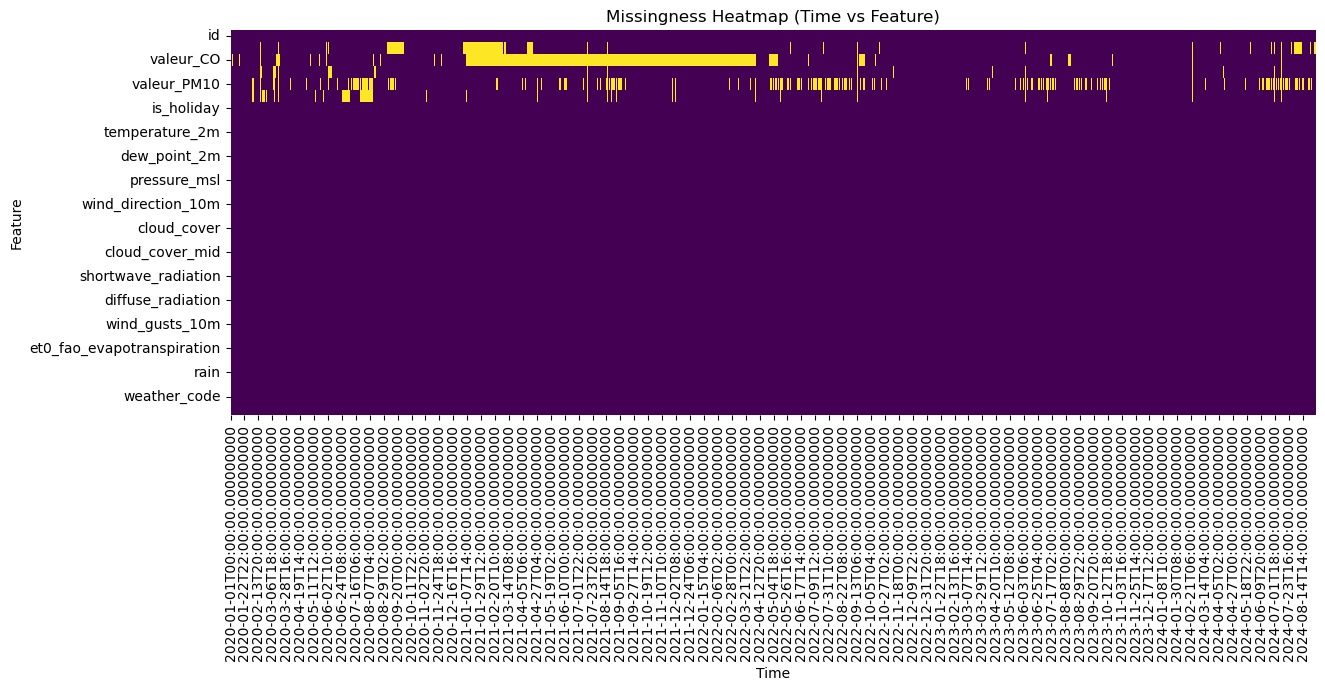

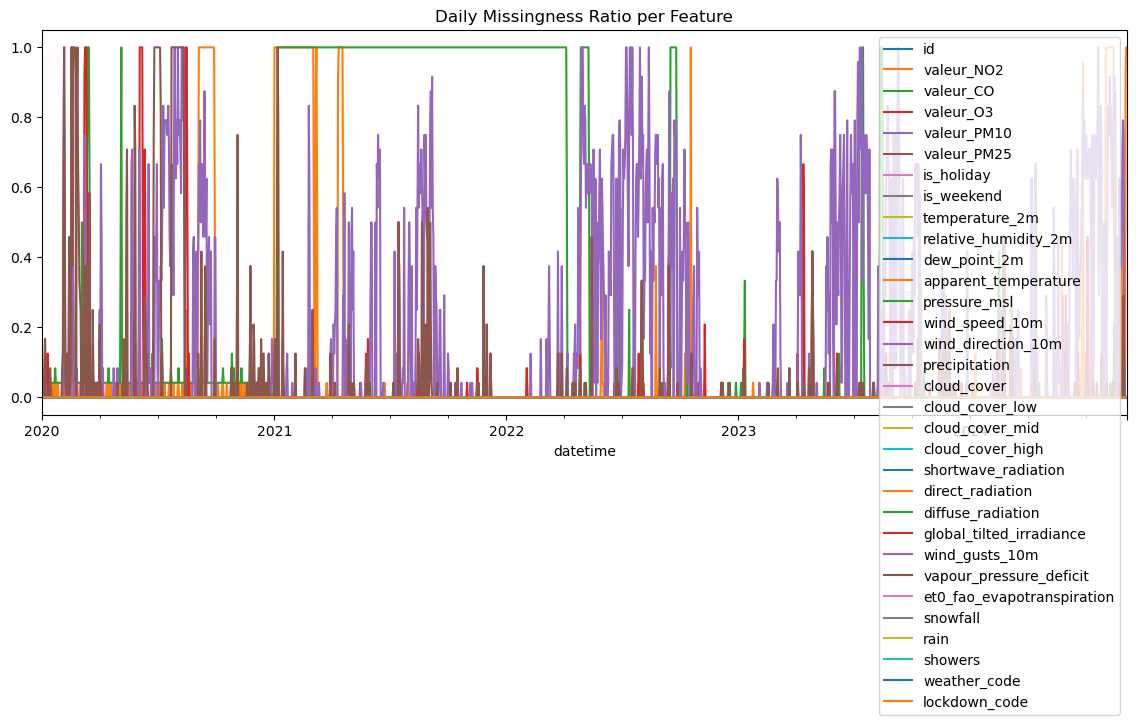

In [18]:
# Step 2: Missingness overview
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_pct.round(2)
})
print(missing_df)

# Visualize missingness heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull().T, cmap='viridis', cbar=False)
plt.title("Missingness Heatmap (Time vs Feature)")
plt.xlabel("Time")
plt.ylabel("Feature")
plt.show()

# Plot missing ratio per day
missing_per_day = df.isna().resample('D').mean()
missing_per_day.plot(figsize=(14,5))
plt.title("Daily Missingness Ratio per Feature")
plt.show()



=== valeur_CO ===
Total missing: 12529 (30.57%)
Consecutive missing value lengths (count of blocks):
valeur_CO
1        370
2          8
3          5
4          2
5          3
6          4
7          1
8          2
11         2
16         1
17         1
18         1
21         1
22         1
25         1
36         1
38         1
79         1
102        1
114        1
258        1
341        1
10949      1
Name: count, dtype: int64
Missing % by hour:
hour
0     29.566745
1     41.861827
2     37.295082
3     29.859485
4     29.859485
5     29.859485
6     30.035129
7     30.327869
8     30.562061
9     30.620609
10    29.976581
11    29.800937
12    29.683841
13    29.683841
14    29.625293
15    29.274005
16    29.215457
17    29.391101
18    29.449649
19    29.449649
20    29.449649
21    29.566745
22    29.566745
23    29.584066
Name: valeur_CO, dtype: float64
Missing % by day of week (0=Monday):
dayofweek
0    30.635246
1    30.811272
2    31.130464
3    30.003415
4    30.532787
5

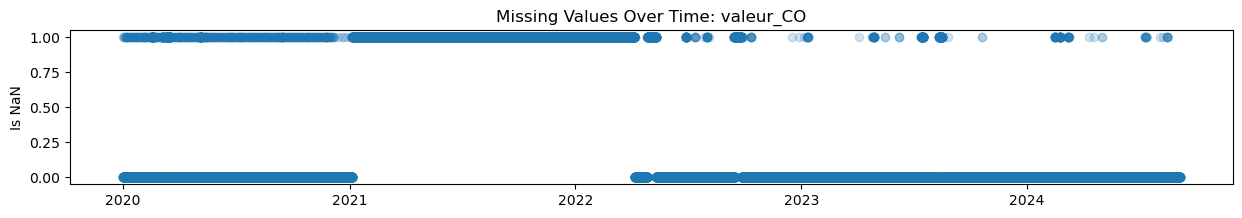


=== valeur_NO2 ===
Total missing: 3297 (8.04%)
Consecutive missing value lengths (count of blocks):
valeur_NO2
1       95
2       14
3       23
4        4
5        2
6        1
7        1
9        1
10       1
11       3
14       1
17       2
20       1
21       1
22       2
25       1
29       1
41       1
59       1
69       1
203      1
331      1
624      1
1500     1
Name: count, dtype: int64
Missing % by hour:
hour
0     7.552693
1     9.250585
2     9.016393
3     7.962529
4     7.903981
5     7.962529
6     7.903981
7     8.196721
8     8.782201
9     9.250585
10    8.899297
11    8.430913
12    8.196721
13    8.255269
14    8.021077
15    7.552693
16    7.259953
17    7.377049
18    7.377049
19    7.494145
20    7.552693
21    7.611241
22    7.611241
23    7.615700
Name: valeur_NO2, dtype: float64
Missing % by day of week (0=Monday):
dayofweek
0    9.255464
1    9.171648
2    7.803962
3    7.137978
4    7.581967
5    6.608607
6    8.743169
Name: valeur_NO2, dtype: float64


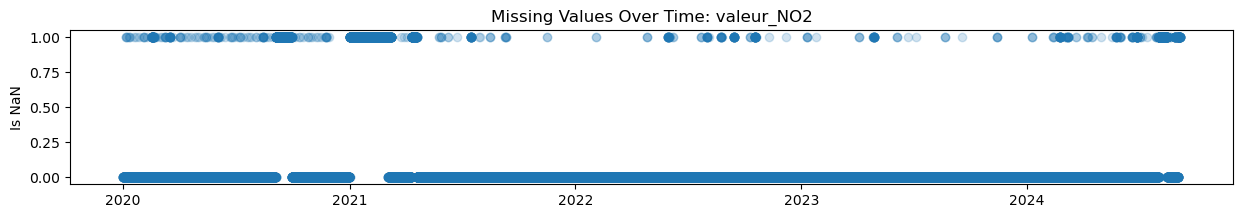


=== valeur_O3 ===
Total missing: 703 (1.72%)
Consecutive missing value lengths (count of blocks):
valeur_O3
1      23
2       8
3      20
4       3
5       3
6       1
7       2
11      1
14      1
17      1
18      1
19      1
21      1
22      1
27      1
29      1
65      1
78      1
105     1
131     1
Name: count, dtype: int64
Missing % by hour:
hour
0     1.580796
1     1.756440
2     1.580796
3     1.580796
4     1.639344
5     1.697892
6     1.873536
7     1.756440
8     1.932084
9     2.459016
10    2.576112
11    2.283372
12    1.990632
13    1.873536
14    1.873536
15    1.639344
16    1.288056
17    1.288056
18    1.288056
19    1.346604
20    1.405152
21    1.463700
22    1.463700
23    1.523140
Name: valeur_O3, dtype: float64
Missing % by day of week (0=Monday):
dayofweek
0    2.032104
1    1.810418
2    1.793033
3    2.219945
4    1.912568
5    0.836749
6    1.400273
Name: valeur_O3, dtype: float64


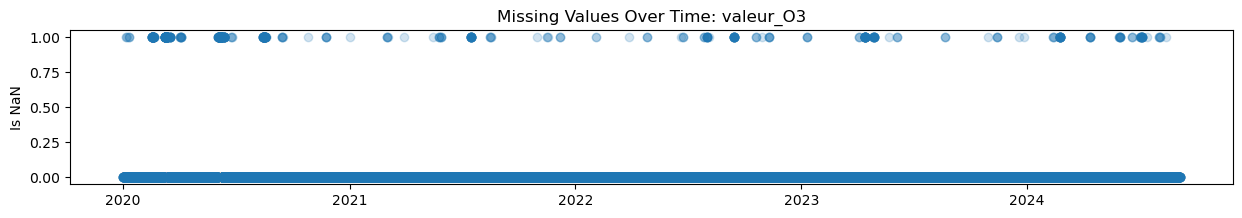


=== valeur_PM10 ===
Total missing: 7167 (17.48%)
Consecutive missing value lengths (count of blocks):
valeur_PM10
1     157
2      74
3      38
4      31
5      21
6      17
7      26
8      27
9      28
10     29
11     22
12     35
13     26
14     29
15     43
16     36
17     22
18     18
19     13
20     12
21      9
22      4
23      4
27      1
29      1
30      1
33      2
34      1
35      1
37      1
38      1
40      4
41      1
42      4
43      1
44      2
52      1
61      1
62      1
66      1
84      1
85      1
90      1
Name: count, dtype: int64
Missing % by hour:
hour
0      7.669789
1      8.255269
2      4.449649
3      3.805621
4      3.864169
5      5.737705
6     14.344262
7     17.447307
8     19.964871
9     21.018735
10    22.775176
11    24.238876
12    26.639344
13    28.044496
14    28.747073
15    29.215457
16    28.395785
17    27.049180
18    24.355972
19    22.189696
20    17.915691
21    14.110070
22    10.889930
23     8.494435
Name: valeur_PM10, dt

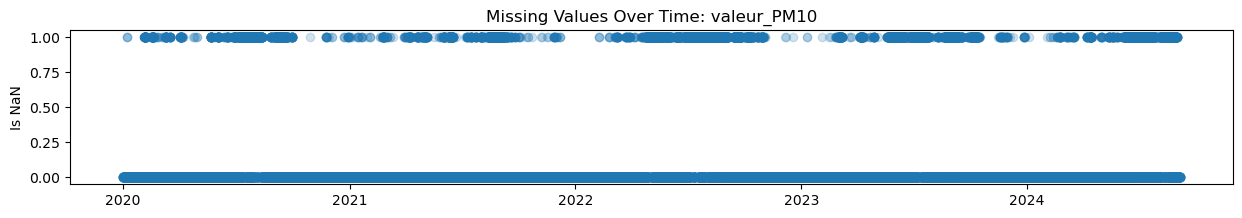


=== valeur_PM25 ===
Total missing: 1791 (4.37%)
Consecutive missing value lengths (count of blocks):
valeur_PM25
1      88
2      49
3      21
4       9
5       7
6       3
7       1
8       2
9       3
10      2
11      3
12      4
14      1
15      1
17      1
18      1
21      2
22      1
25      1
30      1
37      1
38      1
43      1
53      1
59      1
118     1
278     1
493     1
Name: count, dtype: int64
Missing % by hour:
hour
0     3.981265
1     4.156909
2     3.922717
3     4.098361
4     3.922717
5     4.215457
6     4.449649
7     4.625293
8     4.800937
9     5.035129
10    4.800937
11    4.449649
12    4.918033
13    5.152225
14    5.035129
15    4.683841
16    4.156909
17    4.039813
18    4.156909
19    4.215457
20    4.156909
21    4.039813
22    4.039813
23    3.807850
Name: valeur_PM25, dtype: float64
Missing % by day of week (0=Monday):
dayofweek
0    4.132514
1    4.508967
2    5.362022
3    5.498634
4    4.030055
5    3.517760
6    3.534836
Name: valeur_PM25

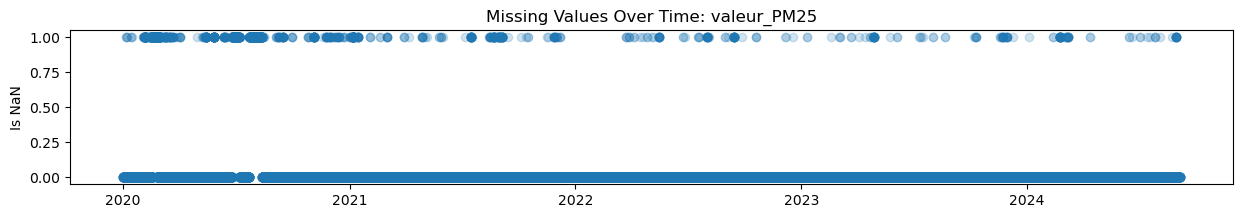

In [ ]:


pollutants = ['valeur_CO', 'valeur_NO2', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Convert 'id' to datetime
df['datetime'] = pd.to_datetime(df['id'], format='%Y-%m-%d %H')

df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month

for col in pollutants:
    print(f"\n=== {col} ===")

    # Total missing values
    total_missing = df[col].isna().sum()
    print(f"Total missing: {total_missing} ({total_missing/len(df)*100:.2f}%)")

    # Consecutive missing lengths
    mask = df[col].isna()
    consec_missing = mask.groupby((mask != mask.shift()).cumsum()).sum()
    consec_missing_blocks = consec_missing[mask.groupby((mask != mask.shift()).cumsum()).first()]
    print("Consecutive missing value lengths (count of blocks):")
    print(consec_missing_blocks.value_counts().sort_index())

    # Missing by hour
    missing_by_hour = df.groupby('hour')[col].apply(lambda x: x.isna().mean()*100)
    print("Missing % by hour:")
    print(missing_by_hour)

    # Missing by day of week
    missing_by_day = df.groupby('dayofweek')[col].apply(lambda x: x.isna().mean()*100)
    print("Missing % by day of week (0=Monday):")
    print(missing_by_day)

    # Plot missing over time
    plt.figure(figsize=(15,2))
    plt.plot(df['datetime'], df[col].isna(), marker='o', linestyle='', alpha=0.2)
    plt.title(f'Missing Values Over Time: {col}')
    plt.ylabel('Is NaN')
    plt.show()


In [20]:
# check missing values count
df.isna().sum().sort_values(ascending=False).head(20)

# check percentage
(df.isna().mean().sort_values(ascending=False) * 100).head(20)


valeur_CO                     30.565246
valeur_PM10                   17.484326
valeur_NO2                     8.043229
valeur_PM25                    4.369252
valeur_O3                      1.715011
id                             0.000000
rain                           0.000000
global_tilted_irradiance       0.000000
wind_gusts_10m                 0.000000
vapour_pressure_deficit        0.000000
et0_fao_evapotranspiration     0.000000
snowfall                       0.000000
weather_code                   0.000000
showers                        0.000000
direct_radiation               0.000000
lockdown_code                  0.000000
datetime                       0.000000
hour                           0.000000
dayofweek                      0.000000
diffuse_radiation              0.000000
dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          40991 non-null  object        
 1   valeur_NO2                  37694 non-null  float64       
 2   valeur_CO                   28462 non-null  float64       
 3   valeur_O3                   40288 non-null  float64       
 4   valeur_PM10                 33824 non-null  float64       
 5   valeur_PM25                 39200 non-null  float64       
 6   is_holiday                  40991 non-null  int64         
 7   is_weekend                  40991 non-null  int64         
 8   temperature_2m              40991 non-null  float64       
 9   relative_humidity_2m        40991 non-null  int64         
 10  dew_point_2m                40991 non-null  float64       
 11  apparent_temperatur

Imputing valeur_O3 -- 73 missing blocks


100%|██████████| 73/73 [00:48<00:00,  1.52it/s]


Imputing valeur_PM25 -- 209 missing blocks


100%|██████████| 209/209 [00:49<00:00,  4.20it/s]


Imputing valeur_NO2 -- 161 missing blocks


100%|██████████| 161/161 [00:51<00:00,  3.11it/s]


Imputing valeur_PM10 -- 749 missing blocks


100%|██████████| 749/749 [01:25<00:00,  8.77it/s]


Imputing valeur_CO -- 411 missing blocks


100%|██████████| 411/411 [02:19<00:00,  2.94it/s] 


Remaining missing: {'valeur_CO': 0, 'valeur_NO2': 0, 'valeur_O3': 0, 'valeur_PM10': 0, 'valeur_PM25': 0}


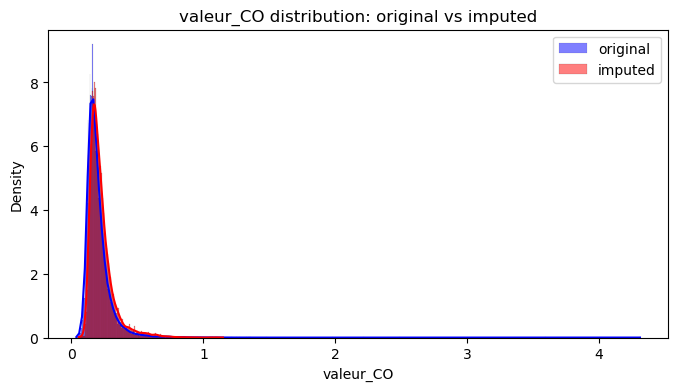

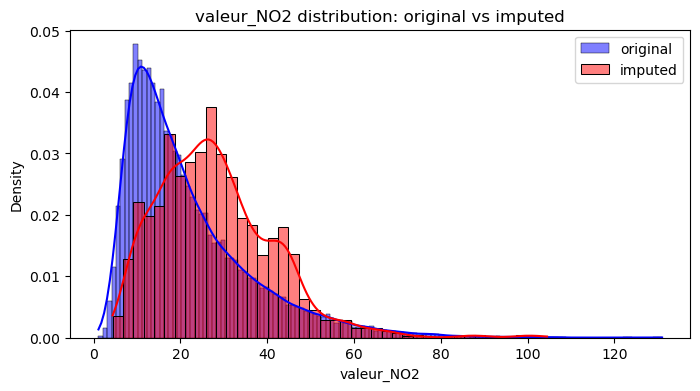

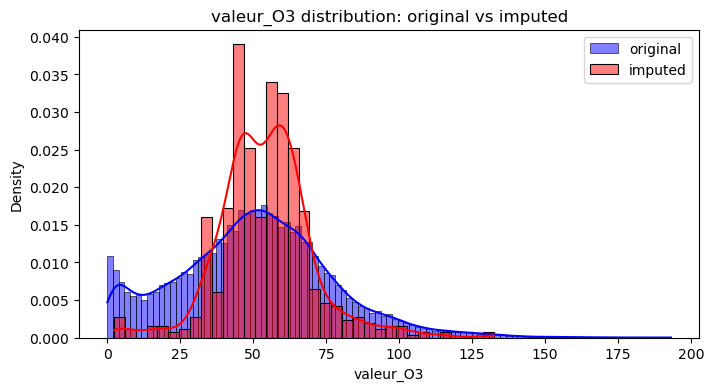

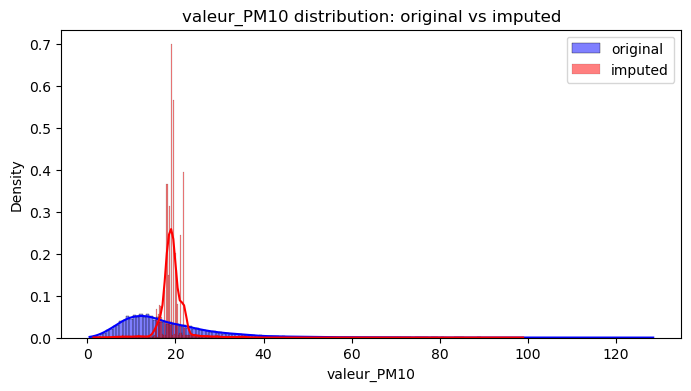

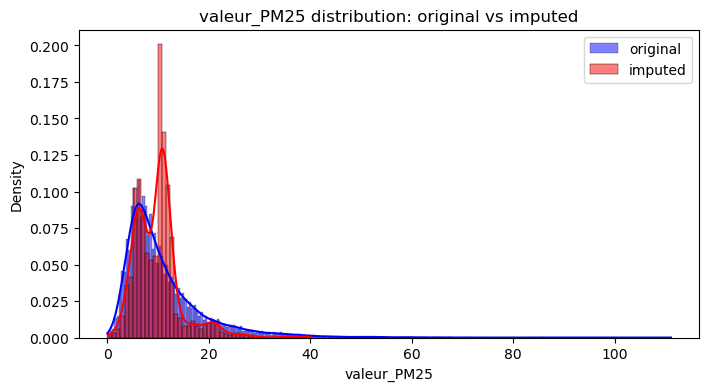

In [22]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from tqdm import tqdm


# PARAMETERS - tweak these
SMALL_GAP = 3        # <= 3 hours -> linear/time interpolation
MEDIUM_GAP = 48      # <= 48 hours -> hour-of-day / rolling fill
LONG_GAP = 48        # > 48 hours -> model-based imputation
RANDOM_STATE = 42

# pollutants list
pollutants = ['valeur_CO','valeur_NO2','valeur_O3','valeur_PM10','valeur_PM25']

# candidate features to use for model-based imputation
base_features = [
    'temperature_2m','relative_humidity_2m','dew_point_2m','apparent_temperature',
    'pressure_msl','wind_speed_10m','wind_direction_10m','precipitation','cloud_cover',
    'hour','dayofweek','month'
]

def available_features(df):
    feat = [c for c in base_features if c in df.columns]
    pollutant_feats = [p for p in pollutants if p in df.columns]
    return feat + pollutant_feats

# Mark missing values BEFORE imputation
for col in pollutants:
    df[col + '_was_missing'] = df[col].isna().astype(int)

# helper: find consecutive missing blocks
def find_missing_blocks(series):
    missing = series.isna().astype(int)
    if missing.sum() == 0:
        return []
    groups = (missing != missing.shift()).cumsum()
    blocks = []
    for g, grp in series.groupby(groups):
        if grp.isna().all():
            start = grp.index[0]
            end = grp.index[-1]
            length = int((end - start) / pd.Timedelta(hours=1)) + 1
            blocks.append((start, end, length))
    return blocks

# function to impute one pollutant gap-aware
def impute_pollutant(df, col):
    blocks = find_missing_blocks(df[col])
    if not blocks:
        return df

    print(f"Imputing {col} -- {len(blocks)} missing blocks")
    feats_all = available_features(df)

    # ensure temporal columns exist
    if 'hour' not in df.columns:
        df['hour'] = df.index.hour
    if 'dayofweek' not in df.columns:
        df['dayofweek'] = df.index.dayofweek
    if 'month' not in df.columns:
        df['month'] = df.index.month

    for start, end, length in tqdm(blocks):
        block_idx = pd.date_range(start=start, end=end, freq='H')

        if length <= SMALL_GAP:
            df.loc[block_idx, col] = df[col].interpolate(method='time').loc[block_idx]
            continue

        if SMALL_GAP < length <= MEDIUM_GAP:
            outside = df.drop(index=block_idx)
            hour_means = outside.groupby('hour')[col].mean()
            global_mean = outside[col].mean()
            fill_vals = [hour_means.get(hr, global_mean) if not pd.isna(hour_means.get(hr, np.nan)) else global_mean
                         for hr in df.loc[block_idx, 'hour']]
            df.loc[block_idx, col] = fill_vals
            continue

        # LONG gap: model-based imputation
        feat_cols = [f for f in feats_all if f != col and f in df.columns]
        train = df[df[col].notna()].dropna(subset=feat_cols + [col])
        predict_mask = df.index.isin(block_idx)
        test = df.loc[predict_mask].dropna(subset=feat_cols, how='any')

        if len(test) == 0 or len(train) < 50:
            outside = df.drop(index=block_idx)
            hour_means = outside.groupby('hour')[col].mean()
            global_mean = outside[col].mean()
            fill_vals = [hour_means.get(hr, global_mean) if not pd.isna(hour_means.get(hr, np.nan)) else global_mean
                         for hr in df.loc[block_idx, 'hour']]
            df.loc[block_idx, col] = fill_vals
            continue

        X_train = train[feat_cols]
        y_train = train[col]
        X_test = df.loc[block_idx, feat_cols].fillna(method='ffill').fillna(method='bfill')
        missing_test_rows = X_test[X_test.isna().any(axis=1)].index
        usable_test = X_test.dropna(axis=0, how='any')

        model = RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
        model.fit(X_train, y_train)

        if len(usable_test) > 0:
            preds = pd.Series(model.predict(usable_test), index=usable_test.index)
            df.loc[preds.index, col] = preds.values

        if len(missing_test_rows) > 0:
            outside = df.drop(index=block_idx)
            hour_means = outside.groupby('hour')[col].mean()
            global_mean = outside[col].mean()
            for idx in missing_test_rows:
                hr = df.at[idx, 'hour']
                df.at[idx, col] = hour_means.get(hr, global_mean)

    return df

# Run for all pollutants
missing_counts = {p: df[p].isna().sum() for p in pollutants}
order = sorted(pollutants, key=lambda p: missing_counts[p])
for p in order:
    df = impute_pollutant(df, p)

print("Remaining missing:", df[pollutants].isna().sum().to_dict())

# PLOT: histogram + KDE for original vs imputed
for col in pollutants:
    plt.figure(figsize=(8,4))
    sns.histplot(df[df[col+'_was_missing']==0][col], color='blue', kde=True, stat='density', label='original')
    sns.histplot(df[df[col+'_was_missing']==1][col], color='red', kde=True, stat='density', label='imputed')
    plt.title(f"{col} distribution: original vs imputed")
    plt.legend()
    plt.show()


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40991 entries, 2020-01-01 00:00:00 to 2024-09-03 22:00:00
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          40991 non-null  object        
 1   valeur_NO2                  40991 non-null  float64       
 2   valeur_CO                   40991 non-null  float64       
 3   valeur_O3                   40991 non-null  float64       
 4   valeur_PM10                 40991 non-null  float64       
 5   valeur_PM25                 40991 non-null  float64       
 6   is_holiday                  40991 non-null  int64         
 7   is_weekend                  40991 non-null  int64         
 8   temperature_2m              40991 non-null  float64       
 9   relative_humidity_2m        40991 non-null  int64         
 10  dew_point_2m                40991 non-null  float64       
 11  apparent_temperatur

In [24]:
df.describe()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_weekend,temperature_2m,relative_humidity_2m,dew_point_2m,...,lockdown_code,datetime,hour,dayofweek,month,valeur_CO_was_missing,valeur_NO2_was_missing,valeur_O3_was_missing,valeur_PM10_was_missing,valeur_PM25_was_missing
count,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,...,40991.000000,40991,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000,40991.000000
mean,22.334763,0.208289,50.650217,18.425921,11.004594,0.030446,0.285721,12.896148,75.291967,8.097229,...,0.355444,2022-05-03 23:00:00,11.499719,3.000049,6.240565,0.305652,0.080432,0.017150,0.174843,0.043693
min,1.100000,0.037000,0.000000,0.500000,0.000000,0.000000,0.000000,-5.700000,17.000000,-16.800000,...,0.000000,2020-01-01 00:00:00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.600000,0.151000,33.300000,11.600000,5.900000,0.000000,0.000000,7.900000,64.000000,4.600000,...,0.000000,2021-03-02 23:30:00,5.500000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.200000,0.184000,50.800000,17.500000,8.700000,0.000000,0.000000,12.500000,79.000000,8.300000,...,0.000000,2022-05-03 23:00:00,11.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29.200000,0.235000,66.500000,21.900000,13.500000,0.000000,1.000000,17.900000,89.000000,12.000000,...,1.000000,2023-07-04 22:30:00,17.000000,5.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,131.000000,4.309000,193.100000,128.500000,111.100000,1.000000,1.000000,39.200000,100.000000,23.200000,...,2.000000,2024-09-03 22:00:00,23.000000,6.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,14.664852,0.102265,26.339930,10.368454,8.034978,0.171812,0.451763,7.063107,16.959621,5.402899,...,0.618476,NaN,6.922122,2.000024,3.381373,0.460689,0.271965,0.129832,0.379838,0.204413


In [25]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,is_holiday,is_weekend,temperature_2m,relative_humidity_2m,...,lockdown_code,datetime,hour,dayofweek,month,valeur_CO_was_missing,valeur_NO2_was_missing,valeur_O3_was_missing,valeur_PM10_was_missing,valeur_PM25_was_missing
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00,42.9,0.7180,15.7,73.1,64.4,1,0,0.9,100,...,0,2020-01-01 00:00:00,0,2,1,0,0,0,0,0
2020-01-01 01:00:00,2020-01-01 01,33.6,0.5870,10.1,74.8,66.0,1,0,-0.1,99,...,0,2020-01-01 01:00:00,1,2,1,0,0,0,0,0
2020-01-01 02:00:00,2020-01-01 02,29.3,0.4165,5.1,51.0,44.9,1,0,2.6,98,...,0,2020-01-01 02:00:00,2,2,1,1,0,0,0,0
2020-01-01 03:00:00,2020-01-01 03,30.5,0.2460,7.2,27.7,25.1,1,0,2.1,100,...,0,2020-01-01 03:00:00,3,2,1,0,0,0,0,0
2020-01-01 04:00:00,2020-01-01 04,29.3,0.2040,8.3,15.3,13.6,1,0,1.9,100,...,0,2020-01-01 04:00:00,4,2,1,0,0,0,0,0


In [26]:
df.to_csv("../data/traindata_imputed.csv", index=False)

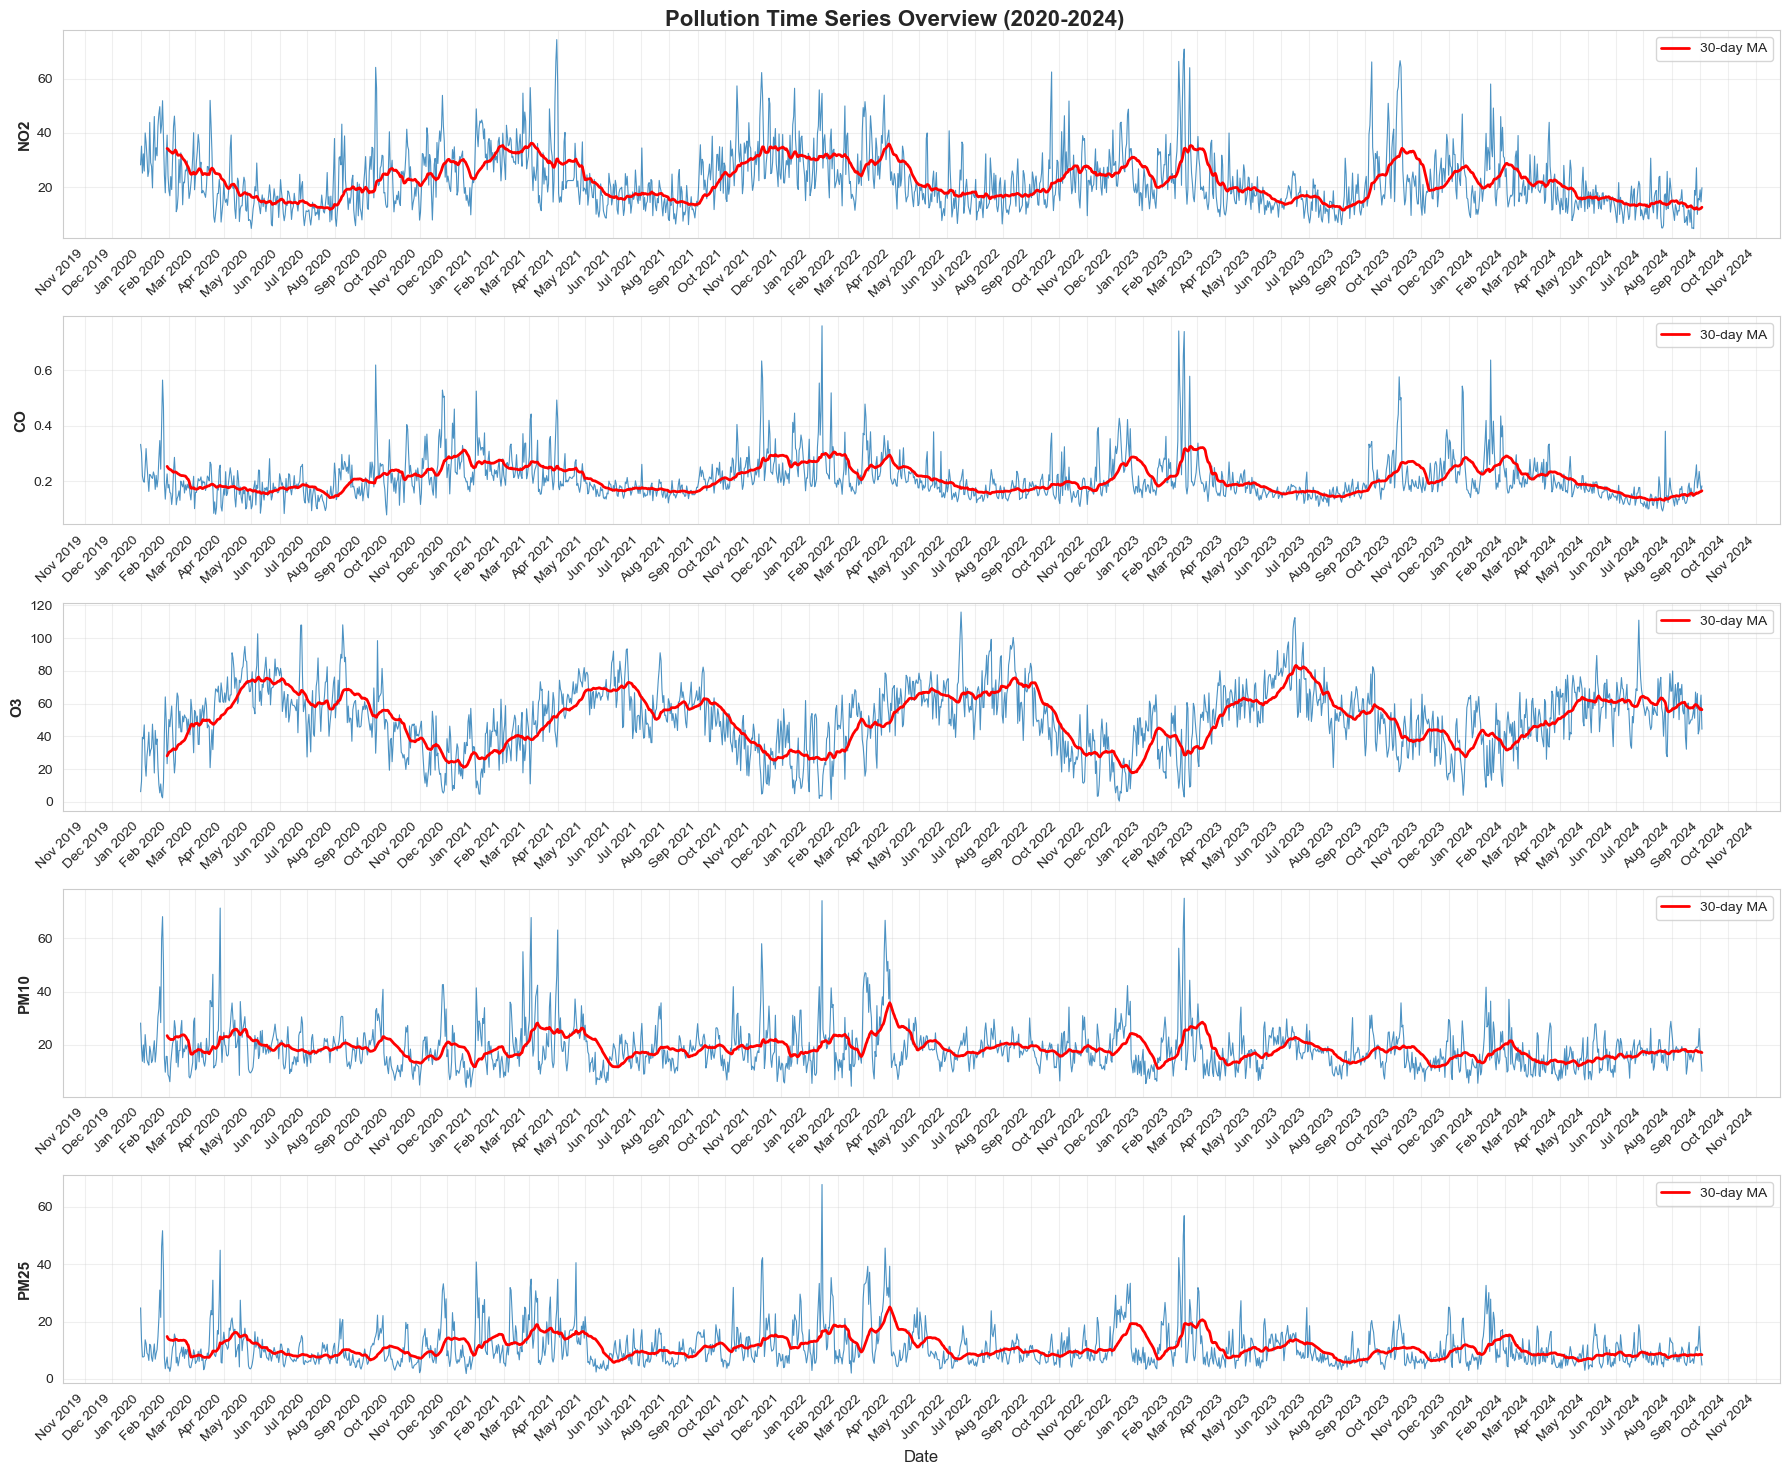

In [ ]:
# ============================================================================
# TIME SERIES OVERVIEW
# ============================================================================
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

fig, axes = plt.subplots(5, 1, figsize=(18, 15))
fig.suptitle('Pollution Time Series Overview (2020-2024)', fontsize=16, fontweight='bold')

# Resample to daily for cleaner visualization
daily_avg = df.resample('D')[pollutants].mean()

for idx, pollutant in enumerate(pollutants):
    axes[idx].plot(daily_avg.index, daily_avg[pollutant], linewidth=0.8, alpha=0.8)
    axes[idx].set_ylabel(pollutant.replace('valeur_', ''), fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

    # Add rolling mean
    rolling_mean = daily_avg[pollutant].rolling(window=30).mean()
    axes[idx].plot(daily_avg.index, rolling_mean, color='red', linewidth=2, label='30-day MA')
    axes[idx].legend(loc='upper right')

    # Format x-axis to show months
    axes[idx].xaxis.set_major_locator(mdates.MonthLocator())
    axes[idx].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., Jan 2020
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[-1].set_xlabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

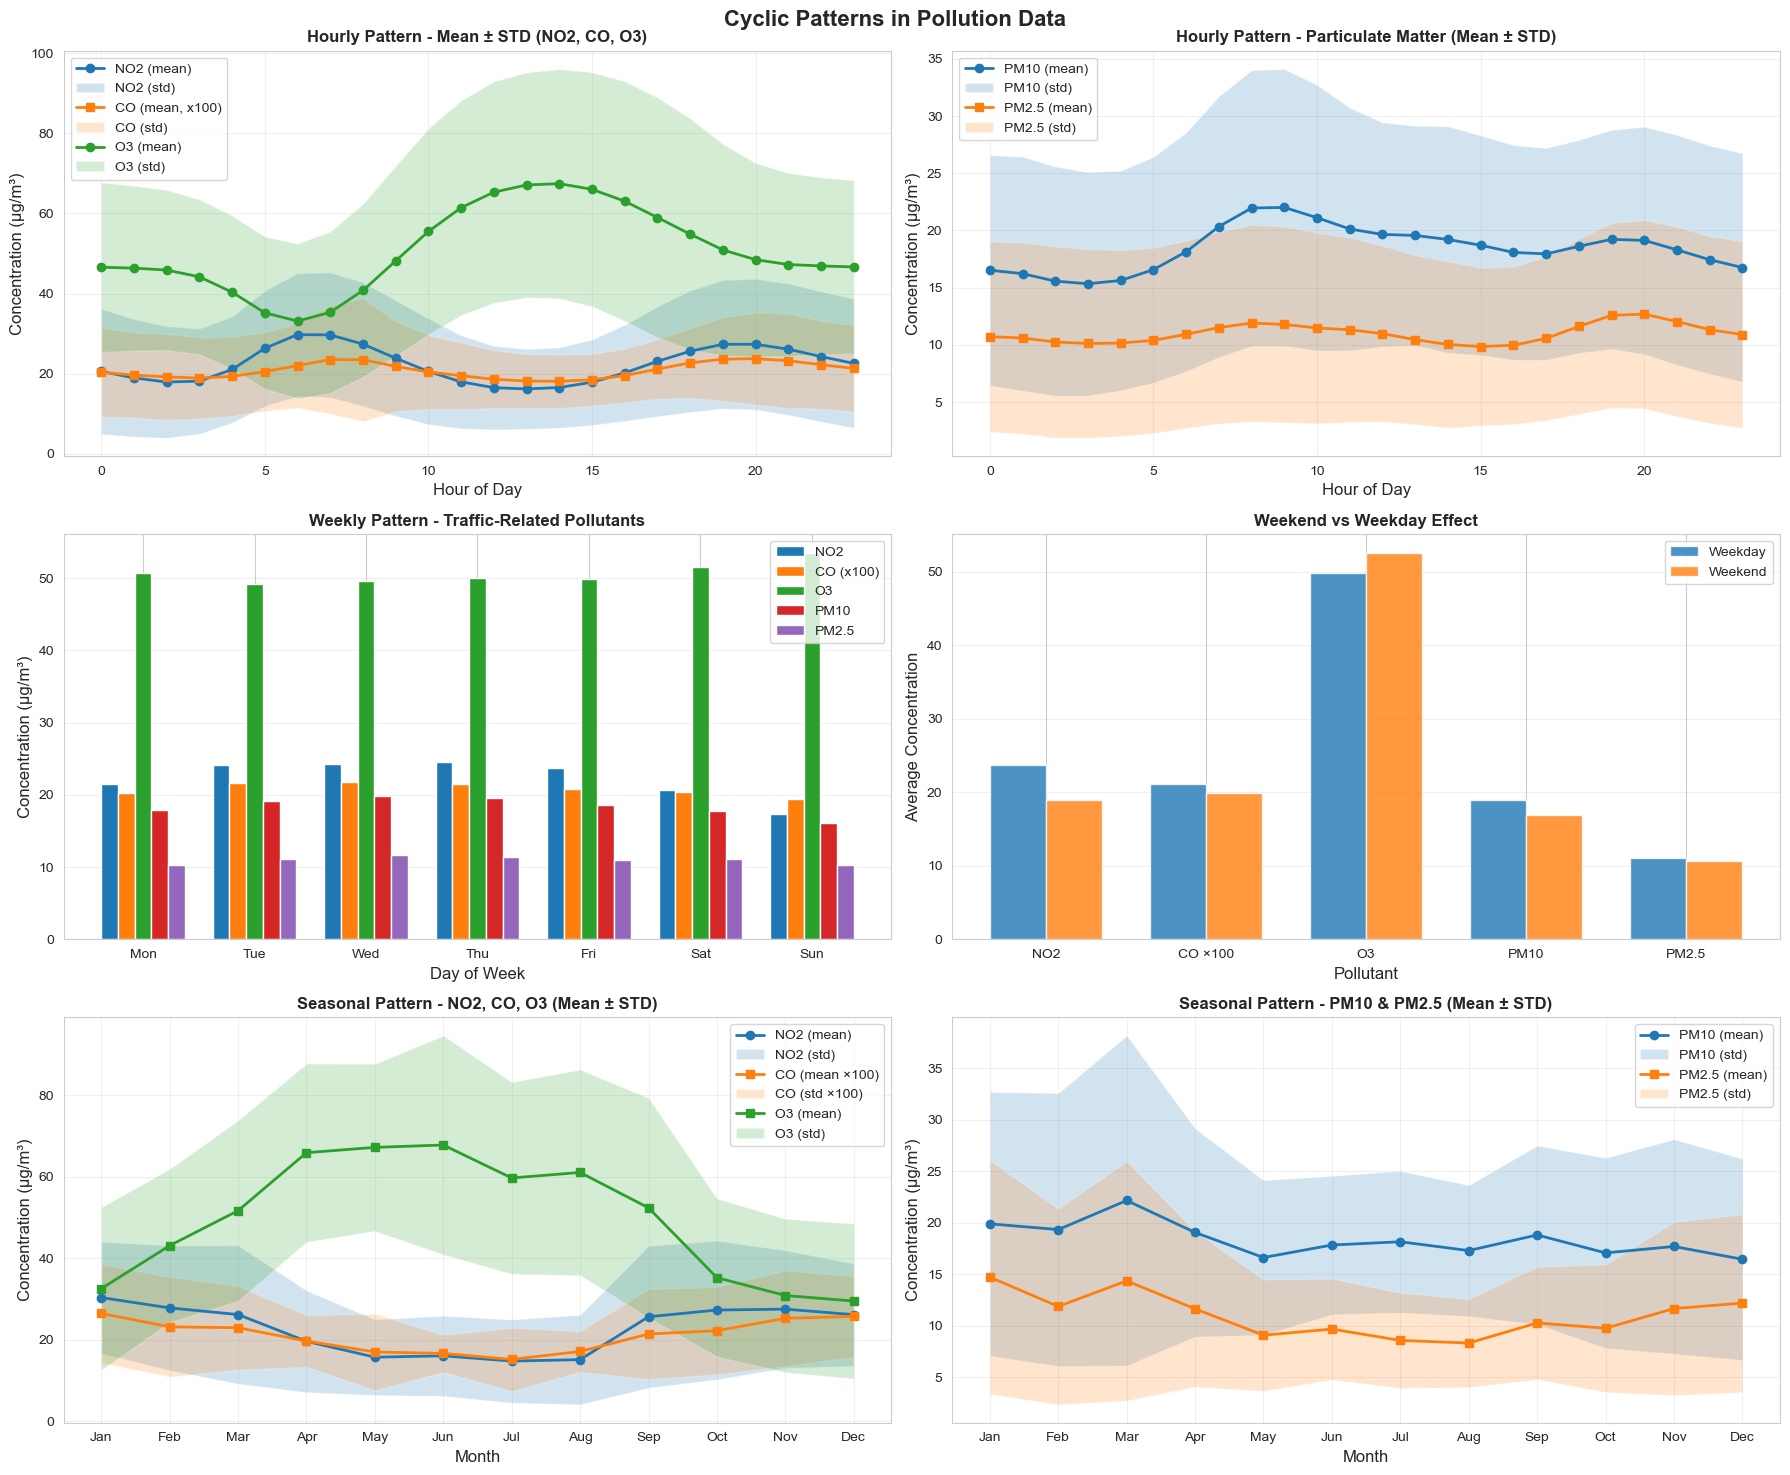

In [ ]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ============================================================================
# CYCLIC PATTERNS ANALYSIS
# ============================================================================

fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Cyclic Patterns in Pollution Data', fontsize=16, fontweight='bold')

# Hourly averages and standard deviation
hourly_stats = df.groupby('hour')[pollutants].agg(['mean', 'std'])

# Plot NO2
axes[0, 0].plot(hourly_stats.index, hourly_stats[('valeur_NO2', 'mean')], marker='o', linewidth=2, label='NO2 (mean)')
axes[0, 0].fill_between(
    hourly_stats.index,
    hourly_stats[('valeur_NO2', 'mean')] - hourly_stats[('valeur_NO2', 'std')],
    hourly_stats[('valeur_NO2', 'mean')] + hourly_stats[('valeur_NO2', 'std')],
    alpha=0.2,
    label='NO2 (std)'
)

# Plot CO (scaled)
axes[0, 0].plot(hourly_stats.index, hourly_stats[('valeur_CO', 'mean')] * 100, marker='s', linewidth=2, label='CO (mean, x100)')
axes[0, 0].fill_between(
    hourly_stats.index,
    (hourly_stats[('valeur_CO', 'mean')] - hourly_stats[('valeur_CO', 'std')]) * 100,
    (hourly_stats[('valeur_CO', 'mean')] + hourly_stats[('valeur_CO', 'std')]) * 100,
    alpha=0.2,
    label='CO (std)'
)

# Plot O3
axes[0, 0].plot(hourly_stats.index, hourly_stats[('valeur_O3', 'mean')], marker='o', linewidth=2, label='O3 (mean)')
axes[0, 0].fill_between(
    hourly_stats.index,
    hourly_stats[('valeur_O3', 'mean')] - hourly_stats[('valeur_O3', 'std')],
    hourly_stats[('valeur_O3', 'mean')] + hourly_stats[('valeur_O3', 'std')],
    alpha=0.2,
    label='O3 (std)'
)

axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Concentration (µg/m³)', fontsize=12)
axes[0, 0].set_title('Hourly Pattern - Mean ± STD (NO2, CO, O3)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)



# PM patterns

# Compute hourly mean and std for PM pollutants
pm_stats = df.groupby('hour')[['valeur_PM10', 'valeur_PM25']].agg(['mean', 'std'])

# PM10 plot with std shading
axes[0, 1].plot(pm_stats.index, pm_stats[('valeur_PM10', 'mean')], marker='o', linewidth=2, label='PM10 (mean)')
axes[0, 1].fill_between(
    pm_stats.index,
    pm_stats[('valeur_PM10', 'mean')] - pm_stats[('valeur_PM10', 'std')],
    pm_stats[('valeur_PM10', 'mean')] + pm_stats[('valeur_PM10', 'std')],
    alpha=0.2,
    label='PM10 (std)'
)

# PM2.5 plot with std shading
axes[0, 1].plot(pm_stats.index, pm_stats[('valeur_PM25', 'mean')], marker='s', linewidth=2, label='PM2.5 (mean)')
axes[0, 1].fill_between(
    pm_stats.index,
    pm_stats[('valeur_PM25', 'mean')] - pm_stats[('valeur_PM25', 'std')],
    pm_stats[('valeur_PM25', 'mean')] + pm_stats[('valeur_PM25', 'std')],
    alpha=0.2,
    label='PM2.5 (std)'
)

axes[0, 1].set_xlabel('Hour of Day', fontsize=12)
axes[0, 1].set_ylabel('Concentration (µg/m³)', fontsize=12)
axes[0, 1].set_title('Hourly Pattern - Particulate Matter (Mean ± STD)', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)


# Day of week patterns

# Weekly means
dow_stats = df.groupby('dayofweek')[pollutants].mean()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Bar width for grouped bars
bar_width = 0.15
x = range(7)

# Plot grouped bars (side by side)
axes[1, 0].bar([i - 2*bar_width for i in x], dow_stats['valeur_NO2'], width=bar_width, label='NO2')
axes[1, 0].bar([i - bar_width for i in x], dow_stats['valeur_CO'] * 100, width=bar_width, label='CO (x100)')
axes[1, 0].bar(x, dow_stats['valeur_O3'], width=bar_width, label='O3')
axes[1, 0].bar([i + bar_width for i in x], dow_stats['valeur_PM10'], width=bar_width, label='PM10')
axes[1, 0].bar([i + 2*bar_width for i in x], dow_stats['valeur_PM25'], width=bar_width, label='PM2.5')

# Labels
axes[1, 0].set_xlabel('Day of Week', fontsize=12)
axes[1, 0].set_ylabel('Concentration (µg/m³)', fontsize=12)
axes[1, 0].set_title('Weekly Pattern - Traffic-Related Pollutants', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(dow_names)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')



# Monthly patterns

# Monthly mean and standard deviation
monthly_stats = df.groupby('month')[pollutants].agg(['mean', 'std'])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# ===== Subplot 1 (2,0): NO2, CO, O3 =====
# NO2
axes[2, 0].plot(monthly_stats.index, monthly_stats[('valeur_NO2', 'mean')],
                marker='o', linewidth=2, label='NO2 (mean)')
axes[2, 0].fill_between(monthly_stats.index,
                        monthly_stats[('valeur_NO2', 'mean')] - monthly_stats[('valeur_NO2', 'std')],
                        monthly_stats[('valeur_NO2', 'mean')] + monthly_stats[('valeur_NO2', 'std')],
                        alpha=0.2, label='NO2 (std)')

# CO (scaled ×100)
axes[2, 0].plot(monthly_stats.index, monthly_stats[('valeur_CO', 'mean')] * 100,
                marker='s', linewidth=2, label='CO (mean ×100)')
axes[2, 0].fill_between(monthly_stats.index,
                        (monthly_stats[('valeur_CO', 'mean')] - monthly_stats[('valeur_CO', 'std')]) * 100,
                        (monthly_stats[('valeur_CO', 'mean')] + monthly_stats[('valeur_CO', 'std')]) * 100,
                        alpha=0.2, label='CO (std ×100)')

# O3
axes[2, 0].plot(monthly_stats.index, monthly_stats[('valeur_O3', 'mean')],
                marker='s', linewidth=2, label='O3 (mean)')
axes[2, 0].fill_between(monthly_stats.index,
                        monthly_stats[('valeur_O3', 'mean')] - monthly_stats[('valeur_O3', 'std')],
                        monthly_stats[('valeur_O3', 'mean')] + monthly_stats[('valeur_O3', 'std')],
                        alpha=0.2, label='O3 (std)')

axes[2, 0].set_xlabel('Month', fontsize=12)
axes[2, 0].set_ylabel('Concentration (µg/m³)', fontsize=12)
axes[2, 0].set_title('Seasonal Pattern - NO2, CO, O3 (Mean ± STD)', fontweight='bold')
axes[2, 0].set_xticks(range(1, 13))
axes[2, 0].set_xticklabels(month_names)
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

# ===== Subplot 2 (2,1): PM10, PM2.5 =====
# PM10
axes[2, 1].plot(monthly_stats.index, monthly_stats[('valeur_PM10', 'mean')],
                marker='o', linewidth=2, label='PM10 (mean)')
axes[2, 1].fill_between(monthly_stats.index,
                        monthly_stats[('valeur_PM10', 'mean')] - monthly_stats[('valeur_PM10', 'std')],
                        monthly_stats[('valeur_PM10', 'mean')] + monthly_stats[('valeur_PM10', 'std')],
                        alpha=0.2, label='PM10 (std)')

# PM2.5
axes[2, 1].plot(monthly_stats.index, monthly_stats[('valeur_PM25', 'mean')],
                marker='s', linewidth=2, label='PM2.5 (mean)')
axes[2, 1].fill_between(monthly_stats.index,
                        monthly_stats[('valeur_PM25', 'mean')] - monthly_stats[('valeur_PM25', 'std')],
                        monthly_stats[('valeur_PM25', 'mean')] + monthly_stats[('valeur_PM25', 'std')],
                        alpha=0.2, label='PM2.5 (std)')

axes[2, 1].set_xlabel('Month', fontsize=12)
axes[2, 1].set_ylabel('Concentration (µg/m³)', fontsize=12)
axes[2, 1].set_title('Seasonal Pattern - PM10 & PM2.5 (Mean ± STD)', fontweight='bold')
axes[2, 1].set_xticks(range(1, 13))
axes[2, 1].set_xticklabels(month_names)
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)



# Weekend vs Weekday comparison

# Scale CO by 100
weekend_comparison = pd.DataFrame({
    'Weekday': df[df['is_weekend'] == 0][pollutants].mean(),
    'Weekend': df[df['is_weekend'] == 1][pollutants].mean()
})

weekend_comparison.loc['valeur_CO'] *= 100  # Scale CO

x = np.arange(len(pollutants))
width = 0.35
axes[1, 1].bar(x - width/2, weekend_comparison['Weekday'], width, label='Weekday', alpha=0.8)
axes[1, 1].bar(x + width/2, weekend_comparison['Weekend'], width, label='Weekend', alpha=0.8)

axes[1, 1].set_xlabel('Pollutant', fontsize=12)
axes[1, 1].set_ylabel('Average Concentration', fontsize=12)
axes[1, 1].set_title('Weekend vs Weekday Effect', fontweight='bold')

# Update labels to indicate CO scaling
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['NO2', 'CO ×100', 'O3', 'PM10', 'PM2.5'])

axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')



plt.tight_layout()
plt.show()

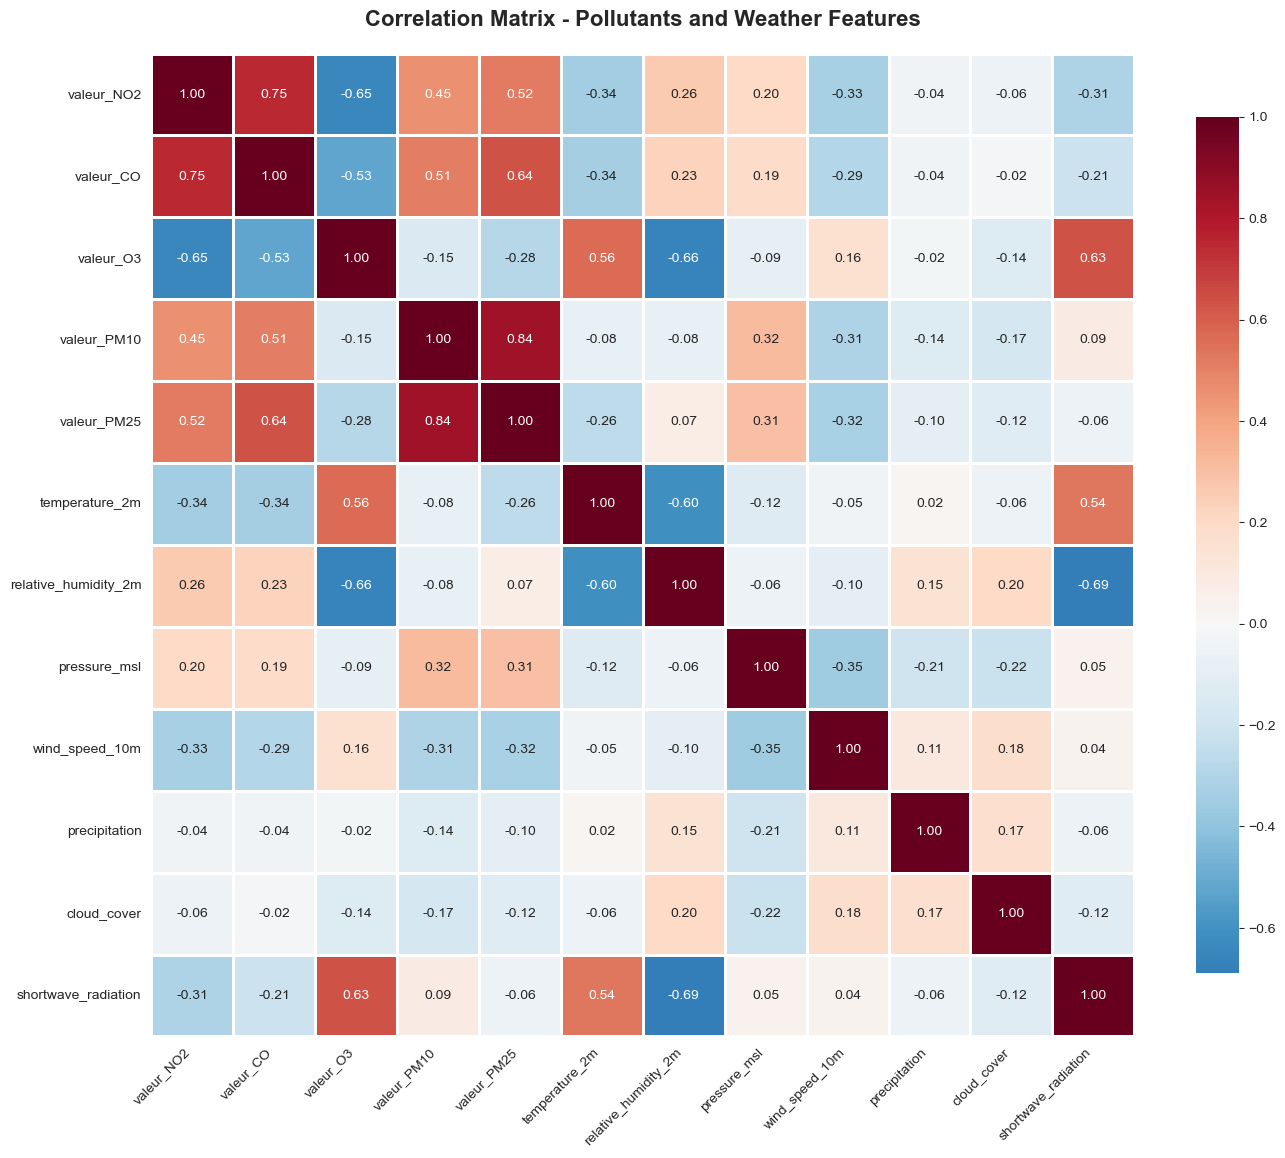

In [ ]:
# ============================================================================
# CORRELATION MATRIX
# ============================================================================

# Select numerical features for correlation
numerical_features = [
    'valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25',
    'temperature_2m', 'relative_humidity_2m', 'pressure_msl', 'wind_speed_10m',
    'precipitation', 'cloud_cover', 'shortwave_radiation'
]

correlation_matrix = df[numerical_features].corr()

# Create correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix - Pollutants and Weather Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


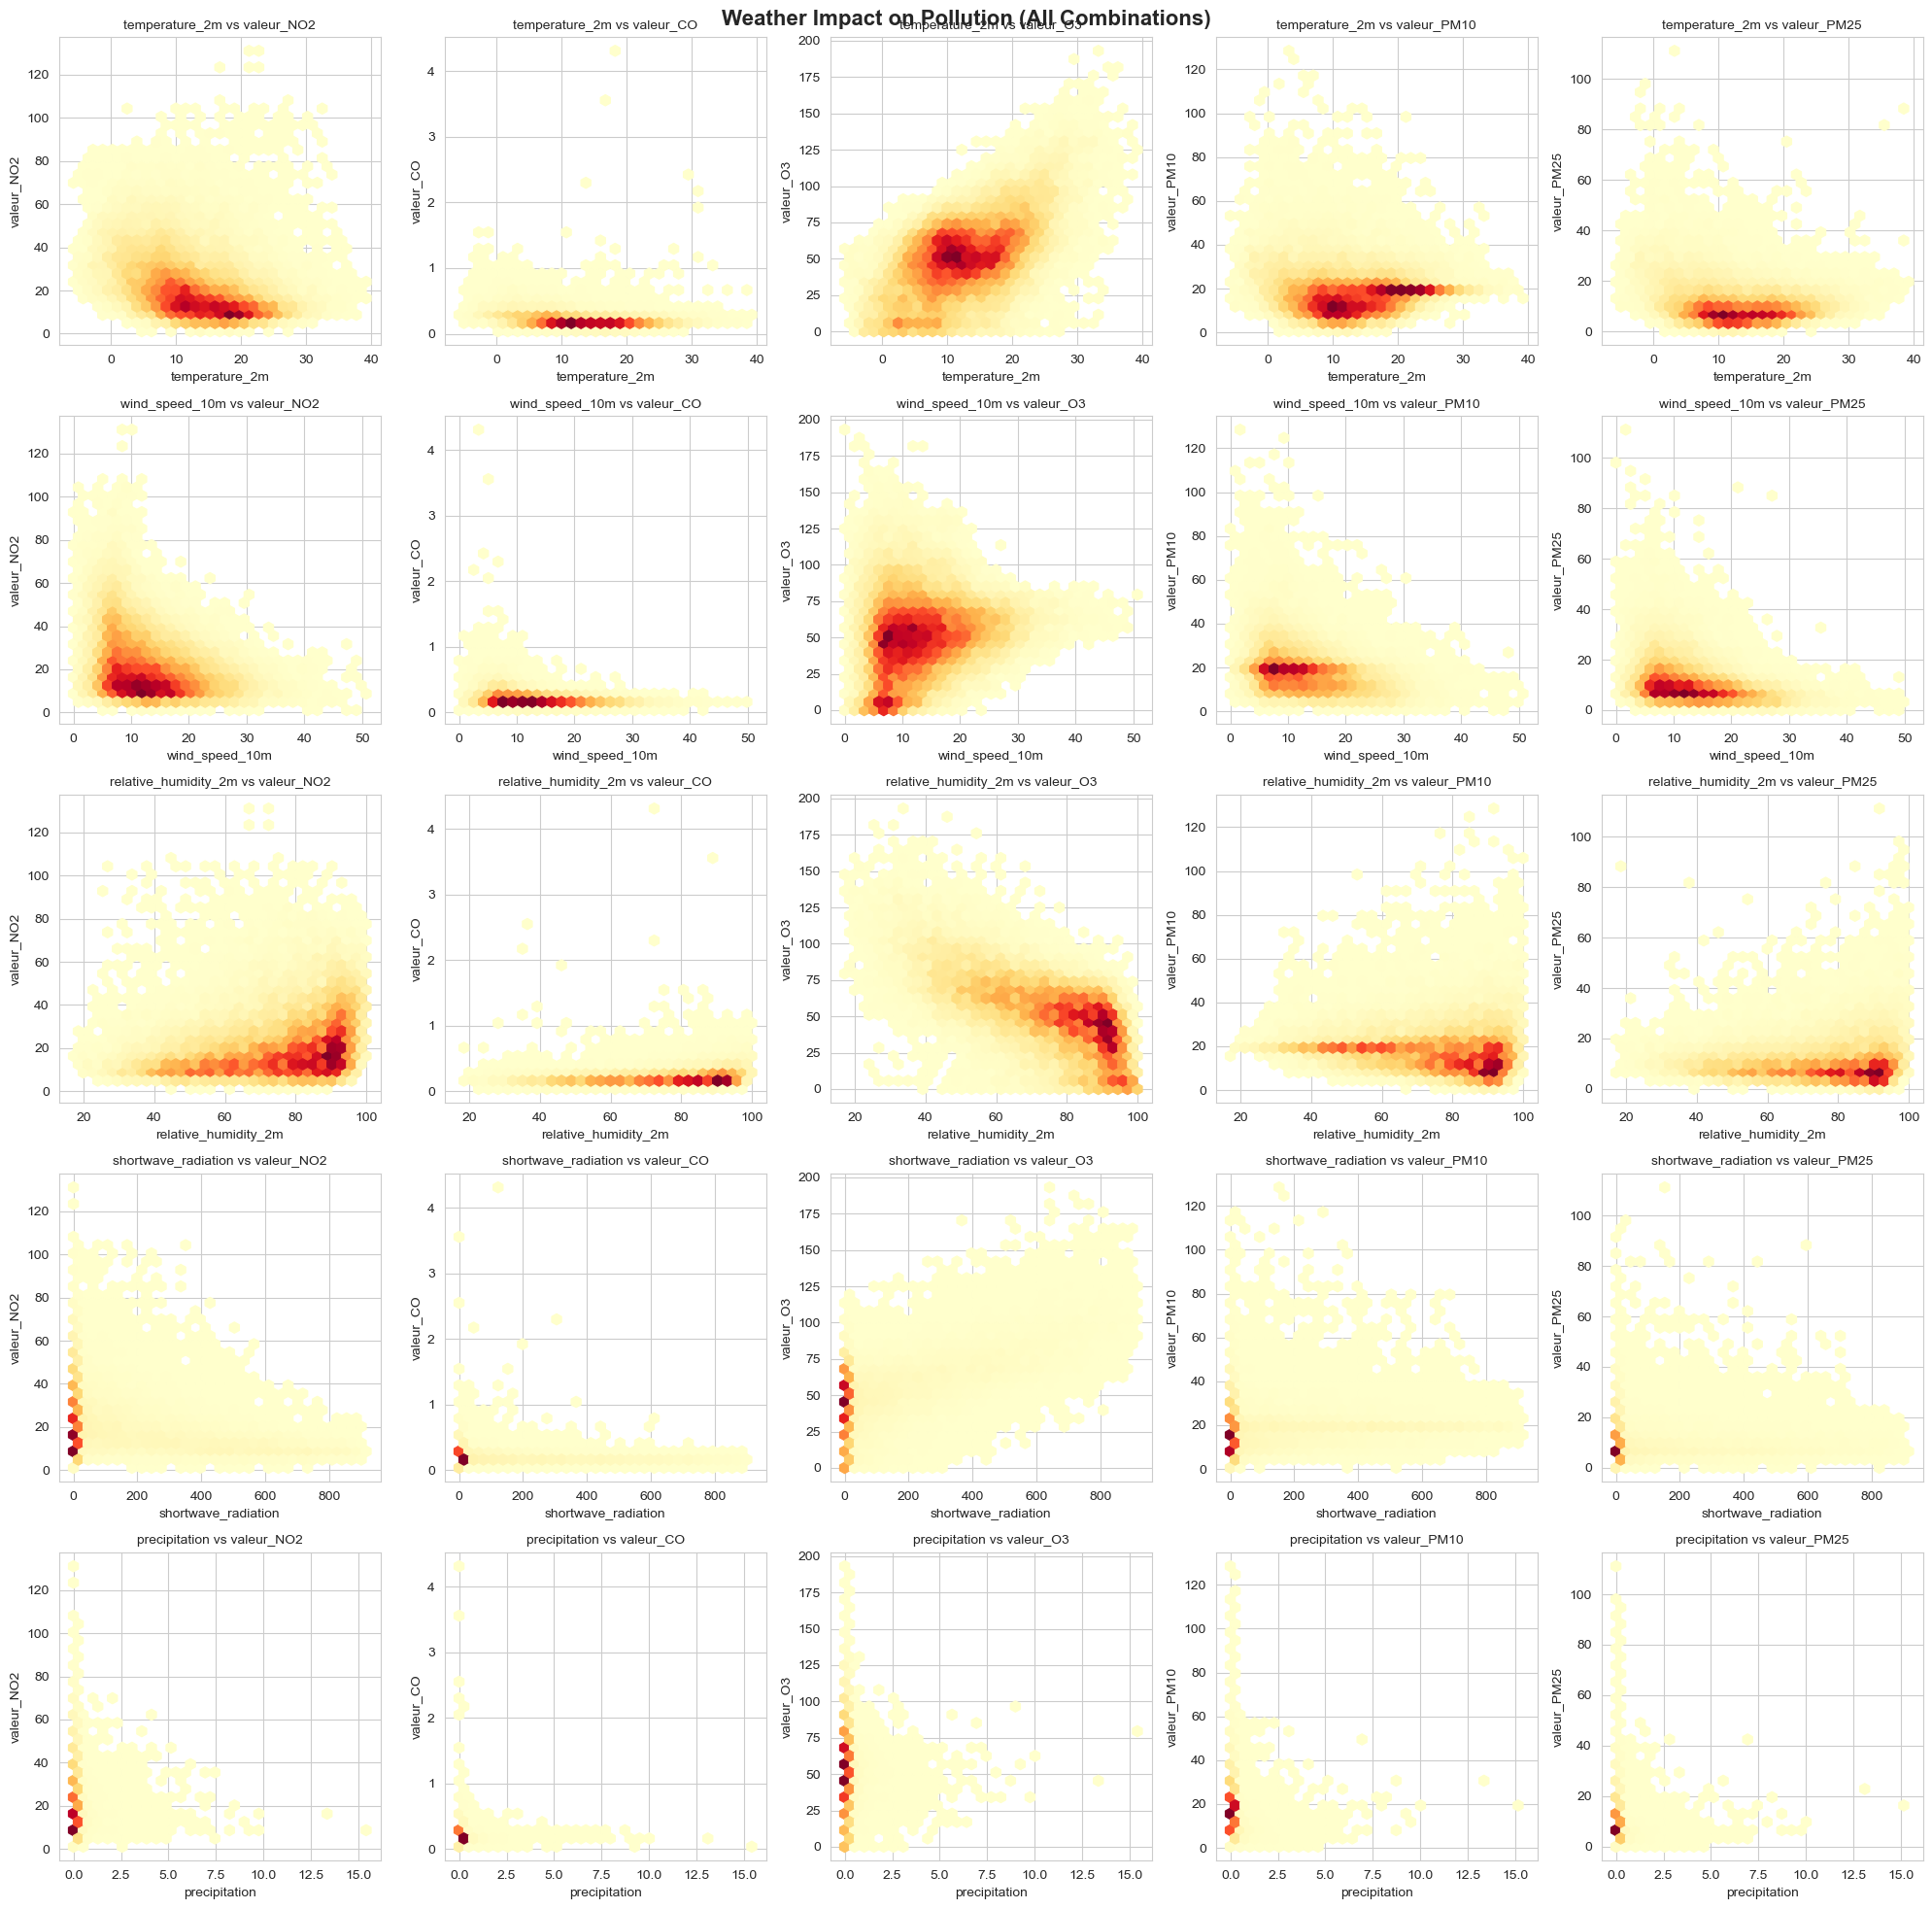

In [ ]:
import matplotlib.pyplot as plt

# Weather variables
weather_vars = ['temperature_2m', 'wind_speed_10m', 'relative_humidity_2m', 'shortwave_radiation', 'precipitation']
pollutants = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

# Create grid: rows = weather variables, cols = pollutants
fig, axes = plt.subplots(len(weather_vars), len(pollutants), figsize=(20, 4*len(weather_vars)))
fig.suptitle('Weather Impact on Pollution (All Combinations)', fontsize=16, fontweight='bold')

for i, wvar in enumerate(weather_vars):
    for j, pol in enumerate(pollutants):
        ax = axes[i, j]

        # Continuous variables: use hexbin if numerical, else boxplot
        if df[wvar].dtype.kind in 'biufc':  # numeric
            ax.hexbin(df[wvar], df[pol], gridsize=30, cmap='YlOrRd', mincnt=1)
        else:
            df.boxplot(column=pol, by=wvar, ax=ax)

        ax.set_xlabel(wvar)
        ax.set_ylabel(pol)
        ax.set_title(f'{wvar} vs {pol}', fontsize=10)

plt.tight_layout()
plt.show()


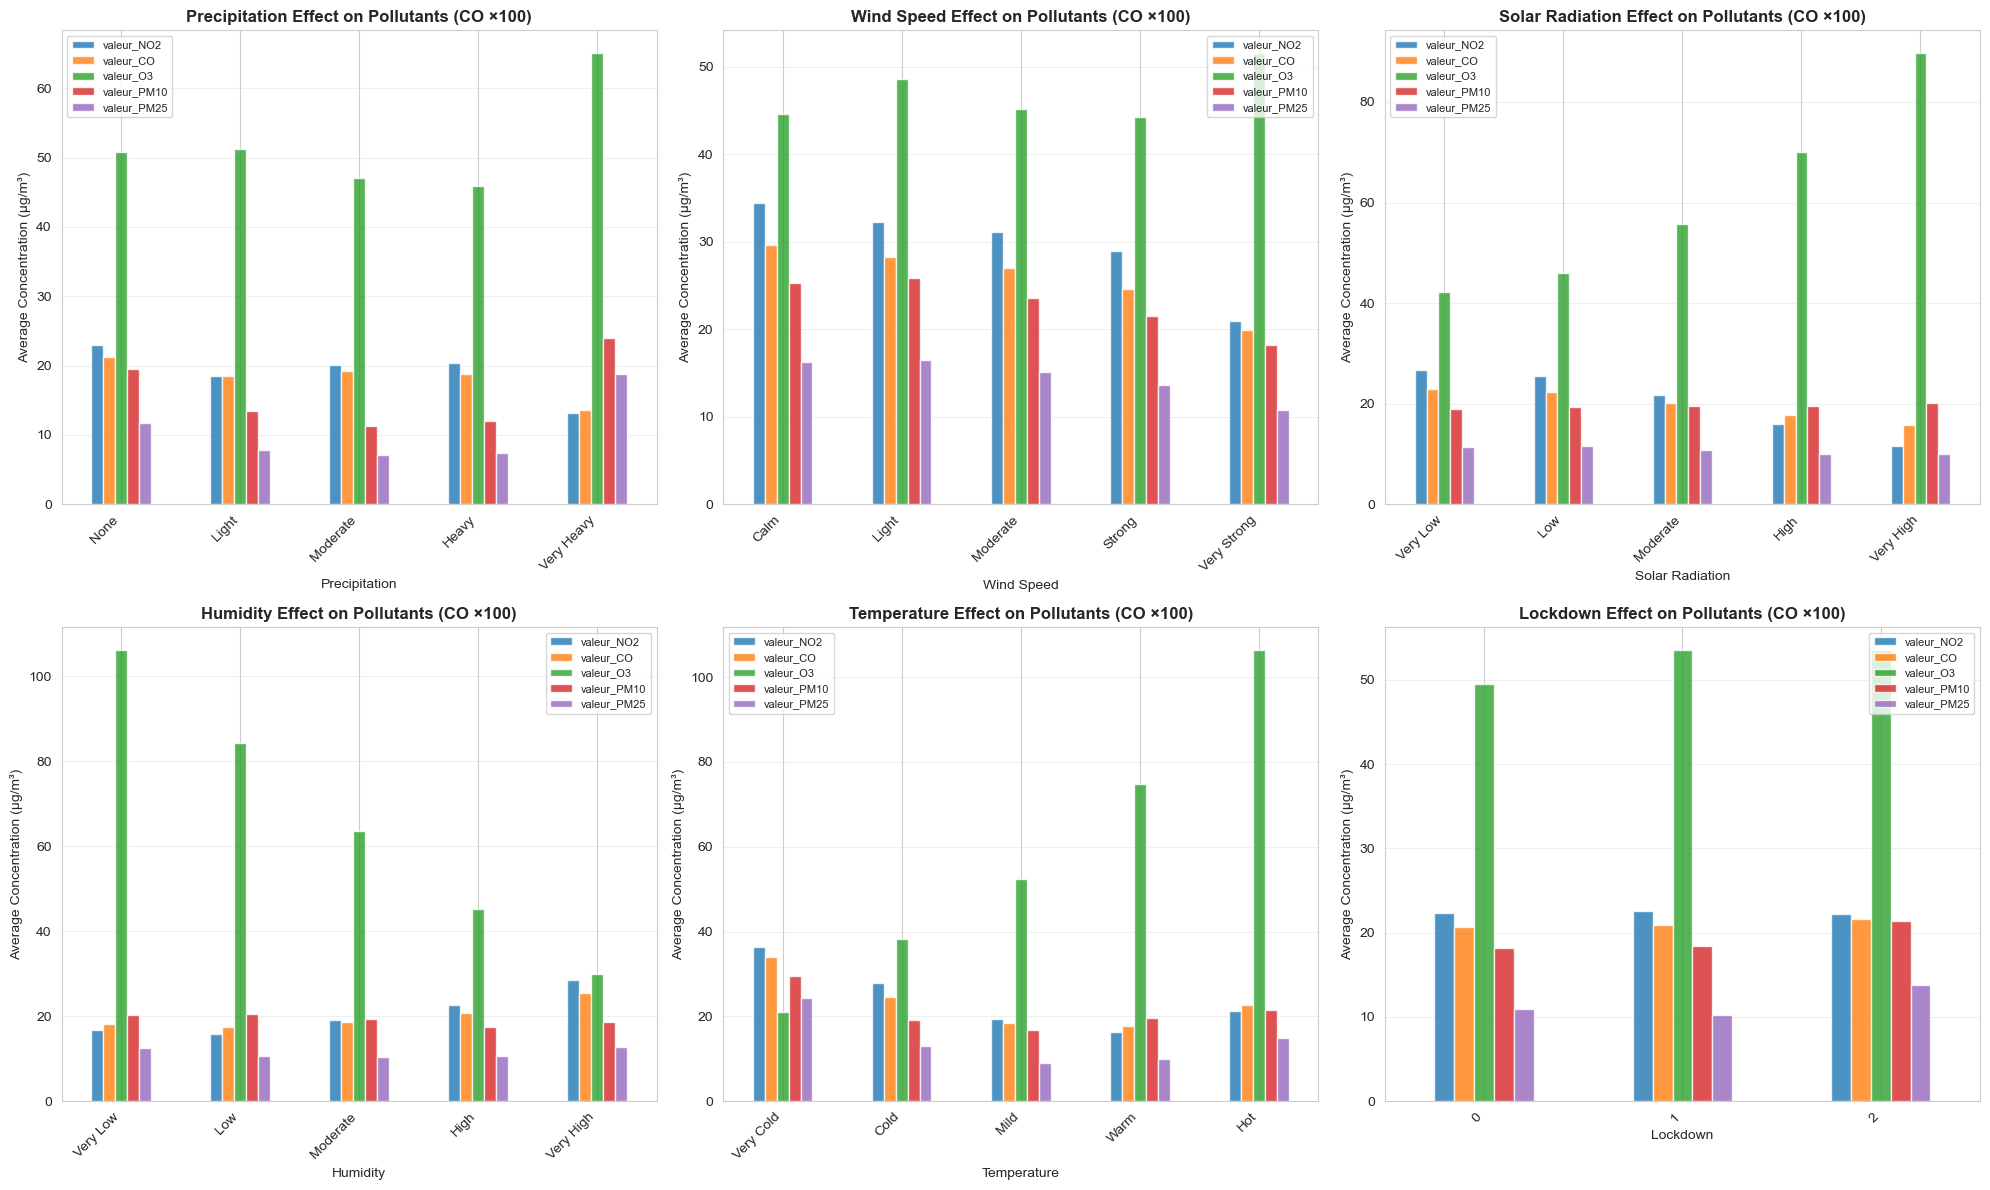

In [ ]:
import matplotlib.pyplot as plt

# Prepare categorical groupings
categorical_vars = {
    'Precipitation': pd.cut(df['precipitation'], bins=[-0.1, 0, 0.5, 2, 10, 100],
                            labels=['None', 'Light', 'Moderate', 'Heavy', 'Very Heavy']),
    'Wind Speed': pd.cut(df['wind_speed_10m'], bins=[0, 1, 3, 5, 8, 20],
                         labels=['Calm', 'Light', 'Moderate', 'Strong', 'Very Strong']),
    'Solar Radiation': pd.cut(df['shortwave_radiation'], bins=[0, 50, 150, 300, 500, 1000],
                              labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']),
    'Humidity': pd.cut(df['relative_humidity_2m'], bins=[0, 30, 50, 70, 90, 100],
                       labels=['Very Low', 'Low', 'Moderate', 'High', 'Very High']),
    'Temperature': pd.cut(df['temperature_2m'], bins=[-10, 0, 10, 20, 30, 40],
                          labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot']),
    'Lockdown': df['lockdown_code']
}

# Create subplots: 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()  # Flatten to index easily

for i, (cat_name, cat_group) in enumerate(categorical_vars.items()):
    # Compute mean per category
    grouped = df.groupby(cat_group)[pollutants].mean()

    # Scale CO ×100
    grouped['valeur_CO'] *= 100

    # Plot grouped bar chart in the corresponding subplot
    grouped.plot(kind='bar', ax=axes[i], alpha=0.8)
    axes[i].set_title(f'{cat_name} Effect on Pollutants (CO ×100)', fontweight='bold')
    axes[i].set_xlabel(cat_name)
    axes[i].set_ylabel('Average Concentration (µg/m³)')
    axes[i].grid(axis='y', alpha=0.3)
    axes[i].legend(fontsize=8)
    plt.setp(axes[i].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# STATISTICAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("STATISTICAL SUMMARY OF POLLUTANTS")
print("="*80)
print(df[pollutants].describe())

print("\n" + "="*80)
print("MISSING DATA SUMMARY")
print("="*80)
missing_cols = [col for col in df.columns if '_was_missing' in col]
missing_summary = df[missing_cols].sum()
print(missing_summary)

print("\n" + "="*80)
print("TOP 10 CORRELATIONS WITH POLLUTANTS")
print("="*80)
for pollutant in pollutants:
    print(f"\n{pollutant}:")
    corr_values = correlation_matrix[pollutant].abs().sort_values(ascending=False)
    print(corr_values[1:6])  # Top 5 (excluding self-correlation)


STATISTICAL SUMMARY OF POLLUTANTS
         valeur_NO2     valeur_CO     valeur_O3   valeur_PM10   valeur_PM25
count  40991.000000  40991.000000  40991.000000  40991.000000  40991.000000
mean      22.334763      0.208289     50.650217     18.425921     11.004594
std       14.664852      0.102265     26.339930     10.368454      8.034978
min        1.100000      0.037000      0.000000      0.500000      0.000000
25%       11.600000      0.151000     33.300000     11.600000      5.900000
50%       18.200000      0.184000     50.800000     17.500000      8.700000
75%       29.200000      0.235000     66.500000     21.900000     13.500000
max      131.000000      4.309000    193.100000    128.500000    111.100000

MISSING DATA SUMMARY
valeur_CO_was_missing      12529
valeur_NO2_was_missing      3297
valeur_O3_was_missing        703
valeur_PM10_was_missing     7167
valeur_PM25_was_missing     1791
dtype: int64

TOP 10 CORRELATIONS WITH POLLUTANTS

valeur_NO2:
valeur_CO         0.753163
vale